In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import os

In [2]:
df = pd.read_csv("heart.csv")

In [6]:
df_subset = pd.concat([df.iloc[:, :3], pd.Series(['...'], index=['...']), df.iloc[:, -1:]], axis=1)
latex = df_subset.head().to_latex(index=False)
print(latex)

\begin{tabular}{rlllr}
\toprule
 Age & Sex & ChestPainType &   0 &  HeartDisease \\
\midrule
40.0 &   M &           ATA & NaN &           0.0 \\
49.0 &   F &           NAP & NaN &           1.0 \\
37.0 &   M &           ATA & NaN &           0.0 \\
48.0 &   F &           ASY & NaN &           1.0 \\
54.0 &   M &           NAP & NaN &           0.0 \\
\bottomrule
\end{tabular}



C:\Users\yoges\AppData\Local\Temp\ipykernel_1340\3172758321.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df_subset.head().to_latex(index=False)


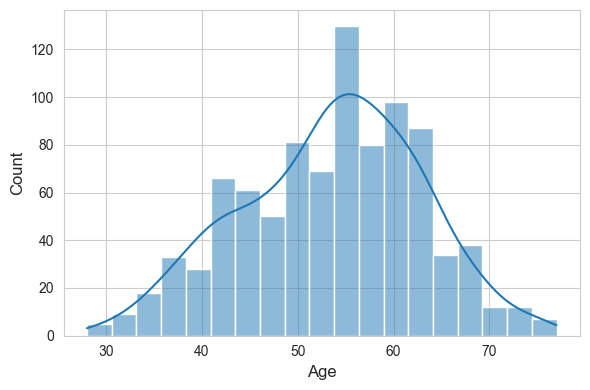

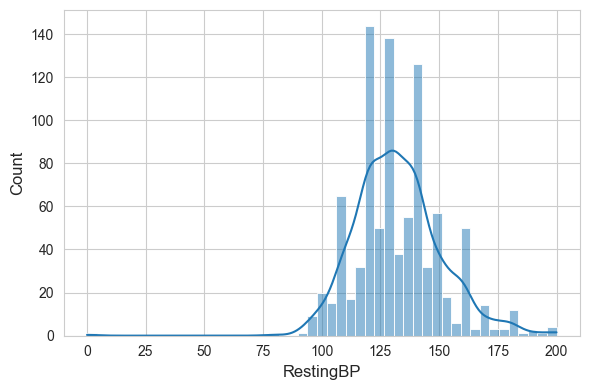

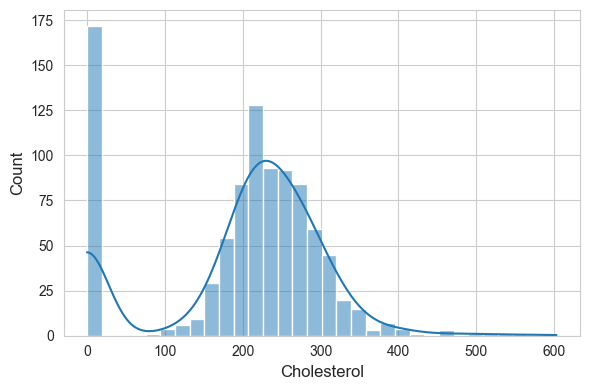

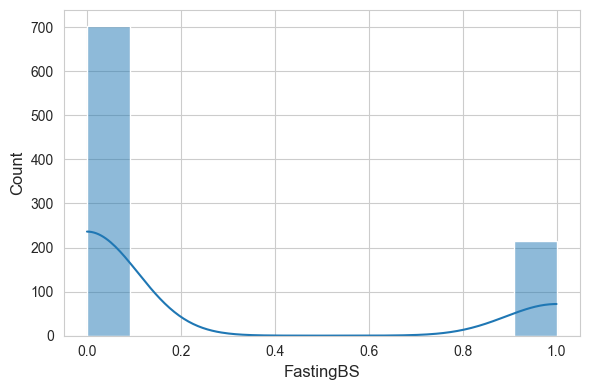

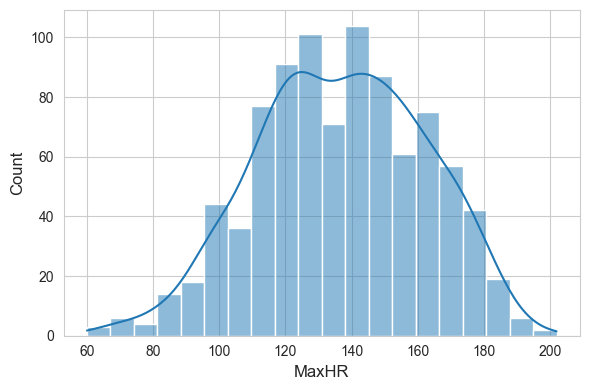

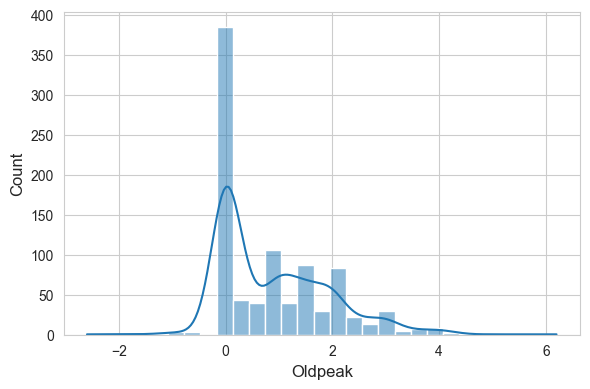

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]

def generate_distribution(param):
    # Set the plot style
    sns.set_style("whitegrid")

    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(df[param], kde=True, ax=ax)

    # Set the labels and font sizes
    ax.set_xlabel(param, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(labelsize=10)

    # Adjust the plot layout
    plt.tight_layout()

    # Save the plot as a PDF file
    plt.savefig(f"./figures/{param}_distribution.pdf")

for p in numerical_columns:
    generate_distribution(p)

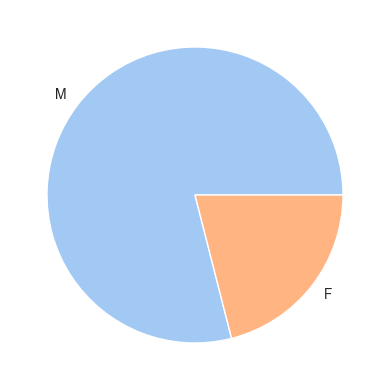

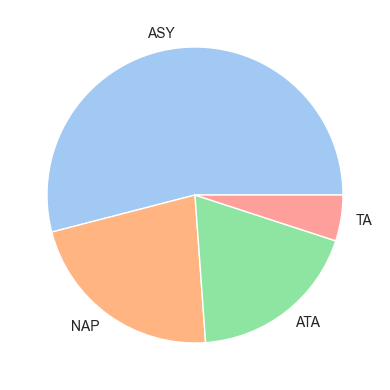

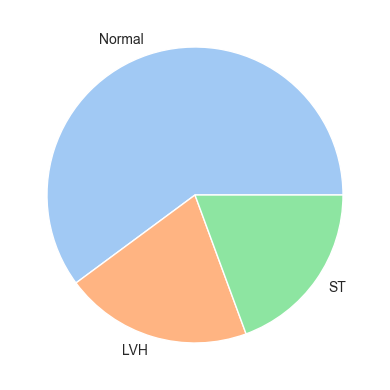

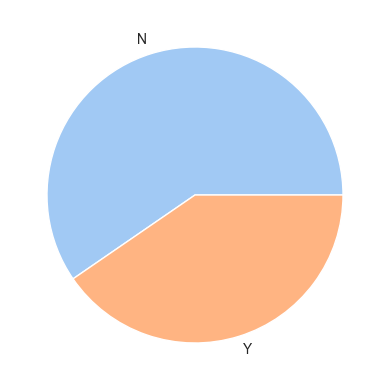

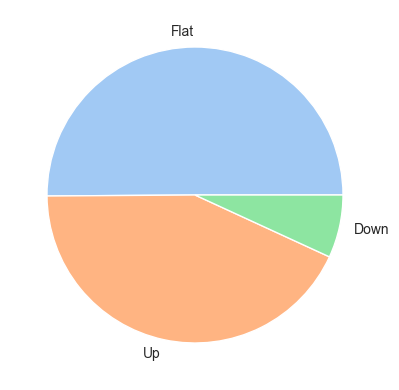

In [19]:
import matplotlib.pyplot as plt

categorical_columns = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

for category in categorical_columns:
    # Set the plot style
    sns.set_style("whitegrid")

    # get value counts and calculate percentage
    counts = df[category].value_counts()
    percentages = counts / len(df) * 100

    # convert to arrays
    labels = counts.index.values
    data = percentages.values

    palette_color = sns.color_palette('pastel')

    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.pie(data, labels = labels, colors=palette_color)

    # Set the labels and font sizes
    # ax.set_xlabel("Heart Disease", fontsize=12)
    # ax.set_ylabel("Sex", fontsize=12)
    # ax.tick_params(labelsize=10)

    # Adjust the plot layout
    plt.tight_layout()

    # Save the plot as a PDF file
    plt.savefig(f"./figures/{category}_pie.pdf")

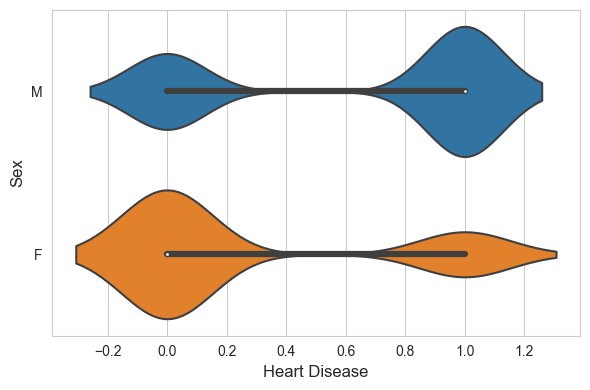

In [14]:

for category in categorical_columns:
    # Set the plot style
    sns.set_style("whitegrid")

    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.violinplot(x = df["HeartDisease"], y = df[category])

    # Set the labels and font sizes
    ax.set_xlabel("Heart Disease", fontsize=12)
    ax.set_ylabel(category, fontsize=12)
    ax.tick_params(labelsize=10)

    # Adjust the plot layout
    plt.tight_layout()

    # Save the plot as a PDF file
    plt.savefig(f"./figures/{category}_violin.pdf")